In [50]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.covariance import GraphicalLasso
import matplotlib.pyplot as plt


In [51]:
df=pd.read_csv('/Users/siddharthshailendra/.cache/kagglehub/datasets/nphantawee/pump-sensor-data/versions/1/mote_carlo_simulation/data/sensor.csv')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [53]:
unique_v = df['machine_status'].unique()
print(unique_v)

['NORMAL' 'BROKEN' 'RECOVERING']


In [54]:
df = df.dropna(axis=1, how='all')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_16 

In [55]:
df['Unnamed: 0']

0              0
1              1
2              2
3              3
4              4
           ...  
220315    220315
220316    220316
220317    220317
220318    220318
220319    220319
Name: Unnamed: 0, Length: 220320, dtype: int64

In [56]:
df=df.drop(columns=['Unnamed: 0'])

In [9]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

In [58]:
sensor_cols = [col for col in df.columns if col.startswith('sensor_')]
num_sensors = len(sensor_cols)

In [59]:
plt.figure(figsize=(18, 20))

<Figure size 1800x2000 with 0 Axes>

<Figure size 1800x2000 with 0 Axes>

In [60]:
rows = 13  # 13 rows x 4 columns = 52 plots (for 51 sensors + legend)
cols = 4
gs = plt.GridSpec(rows, cols)

In [61]:
colors = plt.cm.viridis(np.linspace(0, 1, num_sensors))

In [17]:
for i, sensor in enumerate(sensor_cols):
    ax = plt.subplot(gs[i//cols, i%cols])
    ax.plot(df['timestamp'], df[sensor], color=colors[i], linewidth=0.5, label=sensor)
    ax.xaxis.set_major_formatter(DateFormatter('%m-%d %H:%M'))
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(sensor, fontsize=8)
    ax.grid(alpha=0.3)
    ax.set_yticklabels([])

: 

In [62]:
plot_df = df.iloc[::50000].copy()

In [63]:
df_stats = plot_df[sensor_cols].describe().T
df_stats['range_group'] = pd.cut(df_stats['mean'], bins=5)

In [64]:
plt.figure(figsize=(18, 15), layout='constrained')

<Figure size 1800x1500 with 0 Axes>

<Figure size 1800x1500 with 0 Axes>

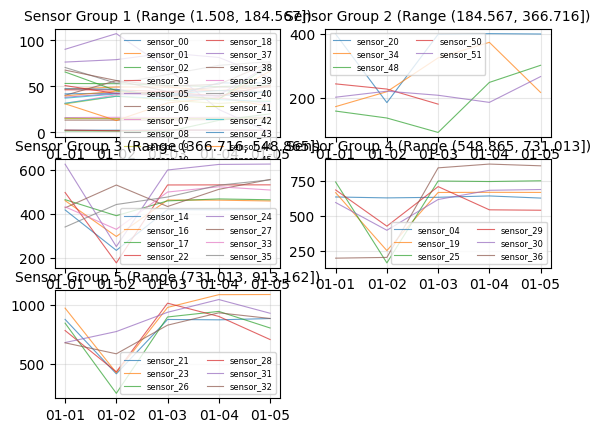

In [65]:
for i, group in enumerate(df_stats['range_group'].cat.categories):
    ax = plt.subplot(3, 2, i+1)
    group_sensors = df_stats[df_stats['range_group'] == group].index
    
    for sensor in group_sensors:
        ax.plot(plot_df['timestamp'], plot_df[sensor], 
               alpha=0.7, linewidth=0.8, label=sensor)
    
    ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
    ax.set_title(f'Sensor Group {i+1} (Range {group})', fontsize=10)
    ax.legend(fontsize=6, ncol=2)
    ax.grid(alpha=0.3)

In [66]:
plt.suptitle('Sensor Readings Grouped by Value Ranges (Downsampled)', y=1.02)
plt.show()

<Figure size 640x480 with 0 Axes>

In [67]:
cols=[col for col in df.columns if col!='timestamp']
df[cols].isnull().sum()

sensor_00         10208
sensor_01           369
sensor_02            19
sensor_03            19
sensor_04            19
sensor_05            19
sensor_06          4798
sensor_07          5451
sensor_08          5107
sensor_09          4595
sensor_10            19
sensor_11            19
sensor_12            19
sensor_13            19
sensor_14            21
sensor_16            31
sensor_17            46
sensor_18            46
sensor_19            16
sensor_20            16
sensor_21            16
sensor_22            41
sensor_23            16
sensor_24            16
sensor_25            36
sensor_26            20
sensor_27            16
sensor_28            16
sensor_29            72
sensor_30           261
sensor_31            16
sensor_32            68
sensor_33            16
sensor_34            16
sensor_35            16
sensor_36            16
sensor_37            16
sensor_38            27
sensor_39            27
sensor_40            27
sensor_41            27
sensor_42       

In [68]:
perc=df[cols].isnull().sum()/len(df)*100

In [69]:
target_sensor = 'sensor_25'
other_sensors = [s for s in sensor_cols if s != target_sensor]

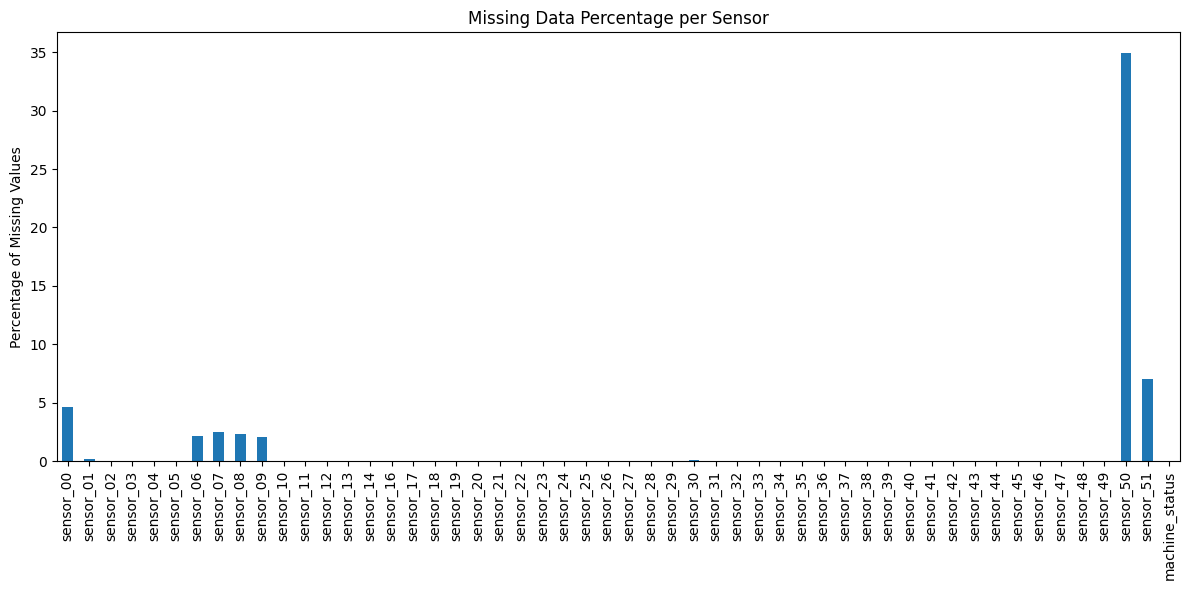

In [70]:
plt.figure(figsize=(12, 6))
perc.plot(kind='bar')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Data Percentage per Sensor')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [71]:
df = df[df['machine_status'] != 'BROKEN']

In [72]:
total_records=len(df)
new_missing=df.isna().sum()
perc_missing=new_missing/total_records*100
print("Missing values after removing BROKEN status:")
print(perc_missing[perc_missing>0].sort_values(ascending=False))

Missing values after removing BROKEN status:
sensor_50    34.957538
sensor_51     6.981885
sensor_00     4.633408
sensor_07     2.474207
sensor_08     2.318066
sensor_06     2.177811
sensor_09     2.085669
sensor_01     0.167489
sensor_30     0.118468
sensor_29     0.032681
sensor_32     0.030865
sensor_18     0.020879
sensor_17     0.020879
sensor_22     0.018610
sensor_25     0.016340
sensor_16     0.014071
sensor_41     0.012255
sensor_39     0.012255
sensor_40     0.012255
sensor_42     0.012255
sensor_38     0.012255
sensor_43     0.012255
sensor_44     0.012255
sensor_45     0.012255
sensor_46     0.012255
sensor_47     0.012255
sensor_48     0.012255
sensor_49     0.012255
sensor_14     0.009532
sensor_26     0.009078
sensor_02     0.008624
sensor_03     0.008624
sensor_05     0.008624
sensor_10     0.008624
sensor_11     0.008624
sensor_12     0.008624
sensor_04     0.008624
sensor_13     0.008624
sensor_33     0.007262
sensor_21     0.007262
sensor_19     0.007262
sensor_20   

In [73]:
df=df.drop(columns=['sensor_50'])

In [74]:
status_groups = df.groupby('machine_status')
status_groups.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.21180,46.310760,634.375000,76.45975,13.411460,16.13136,15.567130,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.21180,46.310760,634.375000,76.45975,13.411460,16.13136,15.567130,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.21180,46.397570,638.888900,73.54598,13.324650,16.03733,15.617770,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.16840,46.397568,628.125000,76.98898,13.317420,16.24711,15.697340,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.21180,46.397568,636.458300,76.58897,13.353590,16.21094,15.697340,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,NORMAL
17156,2018-04-12 21:56:00,0.000000,53.55902,52.77777,43.402775,204.725098,53.74214,3.045428,17.42621,15.740740,...,36.979164,49.47916,50.347220,51.21528,49.18982,49.479170,431.7130,133.10190,341.7245,RECOVERING
17157,2018-04-12 21:57:00,0.000000,53.55902,52.77777,43.402775,201.137131,52.49996,7.537616,13.53443,9.324364,...,36.979160,48.17708,49.768520,50.92593,48.03241,53.819440,451.3889,140.04630,466.1458,RECOVERING
17158,2018-04-12 21:58:00,0.000000,52.77777,52.69097,43.402770,204.030655,57.19875,7.609953,16.60880,16.203700,...,36.718750,46.87500,48.032410,50.34722,47.45370,58.159720,466.4352,144.96530,366.0301,RECOVERING
17159,2018-04-12 21:59:00,0.000000,52.60416,52.73437,43.446180,203.567688,50.96181,7.573785,16.70284,16.160300,...,36.718750,45.83333,47.453700,49.76852,46.58565,63.657410,474.8264,149.01620,374.4213,RECOVERING
17160,2018-04-12 22:00:00,NaN,52.51736,52.69097,43.446180,203.567688,49.78948,7.559317,16.56539,16.239870,...,36.718750,44.27083,46.296300,48.03241,45.13889,75.231480,477.7199,162.61570,356.1921,RECOVERING


In [75]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [78]:
total_records = len(df)
missing_counts = df.isna().sum()
missing_percent = (missing_counts / total_records) * 100

In [79]:
df_imputed = df.copy()

In [81]:
high_missing = missing_percent[missing_percent > 5].index.tolist()
low_missing = missing_percent[(missing_percent > 0) & (missing_percent <= 5)].index.tolist()
    
print(f"High missing sensors (>5%): {high_missing}")
print(f"\nLow missing sensors (≤5%): {low_missing}")

High missing sensors (>5%): ['sensor_51']

Low missing sensors (≤5%): ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49']


In [82]:
if low_missing:
        imputer = IterativeImputer(max_iter=20, random_state=42)
        df_imputed[low_missing] = imputer.fit_transform(df_imputed[low_missing])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [83]:
for sensor in high_missing:
        if sensor in df.columns:
            print(f"\nProcessing high-missing sensor: {sensor}")
            
            # Calculate median and IQR by machine status
            status_stats = df.groupby('machine_status')[sensor].agg(['median', lambda x: x.quantile(0.75) - x.quantile(0.25)])
            status_stats.columns = ['median', 'iqr']
            
            # Impute with status-specific median + noise scaled by IQR
            for status in ['NORMAL', 'RECOVERING']:
                mask = (df['machine_status'] == status) & (df[sensor].isna())
                n_missing = mask.sum()
                
                if n_missing > 0:
                    median = status_stats.loc[status, 'median']
                    scale = status_stats.loc[status, 'iqr'] / 1.349  # Approximate SD from IQR
                    
                    # Impute with noise proportional to IQR
                    df_imputed.loc[mask, sensor] = median + np.random.normal(0, scale/3, n_missing)


Processing high-missing sensor: sensor_51


In [84]:
sensor_cols=[cols for cols in df_imputed if cols!='timestamp']

In [87]:
from scipy.stats import ks_2samp
import warnings
results = []
    
for sensor in sensor_cols:
        orig = df[sensor].dropna()
        imputed = df_imputed[sensor][df[sensor].isna()]
        
        if len(imputed) > 0:
            # Calculate distribution metrics
            ks_stat, ks_p = ks_2samp(orig, imputed)
            
            results.append({
                'sensor': sensor,
                'missing_pct': (len(imputed)/len(df))*100,
                'imputed_count': len(imputed),
                'mean_diff_pct': 100*(imputed.mean() - orig.mean())/orig.mean(),
                'std_diff_pct': 100*(imputed.std() - orig.std())/orig.std(),
                'ks_stat': ks_stat,
                'ks_pvalue': ks_p
            })
results_df = pd.DataFrame(results)
    
    # Add quality assessment
results_df['quality'] = pd.cut(results_df['ks_stat'],
                                 bins=[0, 0.05, 0.1, 0.2, 1],
                                 labels=['Excellent', 'Good', 'Fair', 'Poor'],
                                 right=False)            

In [88]:
print(results_df.sort_values('ks_stat').to_string(float_format="%.4f"))

       sensor  missing_pct  imputed_count  mean_diff_pct  std_diff_pct  ks_stat  ks_pvalue quality
49  sensor_51       6.9819          15382       -17.6878      -40.7178   0.2548     0.0000    Poor
41  sensor_42       0.0123             27        -0.8633      -90.4351   0.3425     0.0025    Poor
5   sensor_05       0.0086             19         1.0595      -85.3210   0.3440     0.0164    Poor
36  sensor_37       0.0073             16         1.6727      -72.4624   0.3457     0.0327    Poor
43  sensor_44       0.0123             27        -0.7394      -74.3044   0.3508     0.0018    Poor
38  sensor_39       0.0123             27        -1.9049      -92.2418   0.3513     0.0017    Poor
40  sensor_41       0.0123             27        -1.1328      -86.9643   0.3609     0.0012    Poor
31  sensor_32       0.0309             68        12.6559      -77.3205   0.3893     0.0000    Poor
42  sensor_43       0.0123             27        -1.2803      -92.0603   0.3918     0.0003    Poor
1   sensor

In [89]:
df_imputed.isna().sum()

timestamp         0
sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0


In [91]:
df_imputed = df_imputed.sort_values('timestamp')
df_imputed.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,NORMAL


In [95]:
df_imputed = df_imputed.drop(columns=['machine_status'])

In [102]:
df=df_imputed.copy()
sensor_cols=[cols for cols in df_imputed if cols!='timestamp']
df_sensors=df[sensor_cols]

In [114]:
target_sensor = 'sensor_25'
target_idx = [sensor_cols.index(target_sensor)]
other_sensors = [s for s in sensor_cols if s != target_sensor]

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_sensors_normalized = pd.DataFrame(scaler.fit_transform(df_sensors), columns=sensor_cols)

In [116]:
pip install pytest

Note: you may need to restart the kernel to use updated packages.


In [117]:
try:
    print("Attempting Graphical Lasso covariance estimation...")
    cov_estimator = GraphicalLasso(alpha=0.05, max_iter=200)
    cov_estimator.fit(df_sensors_normalized)
    cov_matrix = cov_estimator.covariance_
    
    # Check if matrix is positive definite
    if not np.all(np.linalg.eigvals(cov_matrix) > 0):
        raise RuntimeError("Graphical Lasso produced non-positive definite matrix")
except Exception as e:
    print(f"Graphical Lasso failed ({str(e)}), falling back to Ledoit-Wolf")
    cov_estimator = LedoitWolf()
    cov_estimator.fit(df_sensors_normalized)
    cov_matrix = cov_estimator.covariance_

# Add small regularization if needed
if not np.all(np.linalg.eigvals(cov_matrix) > 0):
    print("Adding regularization to ensure positive definiteness")
    cov_matrix += 0.01 * np.eye(cov_matrix.shape[0])

Attempting Graphical Lasso covariance estimation...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/covariance/_graph_lasso.py:192: ConvergenceWarning: graphical_lasso: did not converge after 200 iteration: dual gap: -4.143e-02
  warnings.warn(


In [118]:
mean_values = df_sensors_normalized.mean().values

In [119]:
# Create conditional distribution for target sensor
# Schur complement decomposition with regularization
sigma_11 = cov_matrix[np.ix_(target_idx, target_idx)]
sigma_12 = cov_matrix[np.ix_(target_idx, [i for i in range(cov_matrix.shape[0]) if i not in target_idx])]
sigma_21 = cov_matrix[np.ix_([i for i in range(cov_matrix.shape[0]) if i not in target_idx], target_idx)]
sigma_22 = cov_matrix[np.ix_([i for i in range(cov_matrix.shape[0]) if i not in target_idx], 
                           [i for i in range(cov_matrix.shape[0]) if i not in target_idx])]

In [ ]:
# Regularized matrix inversion
sigma_22_inv = np.linalg.pinv(sigma_22 + 1e-6 * np.eye(sigma_22.shape[0]))
conditional_cov = sigma_11 - sigma_12 @ sigma_22_inv @ sigma_21

In [121]:

# Ensure conditional covariance is positive
conditional_cov = np.maximum(conditional_cov, 1e-6)

In [122]:
# Monte Carlo Simulation Parameters
n_steps = 500
n_simulations = 50
historical_data = df_sensors_normalized.values[-100:]

In [123]:
# Run simulations
simulations = []
for _ in range(n_simulations):
    sim_data = historical_data.copy()
    
    for _ in range(n_steps):
        current_state = sim_data[-1]
        other_values = np.delete(current_state, target_idx)
        
        # Calculate conditional mean
        sigma_12 = cov_matrix[target_idx, :][:, [i for i in range(cov_matrix.shape[0]) if i not in target_idx]]
        sigma_22 = cov_matrix[np.ix_([i for i in range(cov_matrix.shape[0]) if i not in target_idx], 
                             [i for i in range(cov_matrix.shape[0]) if i not in target_idx])]
        sigma_22_inv = np.linalg.pinv(sigma_22 + 1e-6 * np.eye(sigma_22.shape[0]))
        diff = other_values - np.delete(mean_values, target_idx)
        conditional_mean = mean_values[target_idx] + sigma_12 @ sigma_22_inv @ diff
        
        # Sample new target value
        new_target = np.random.normal(conditional_mean, np.sqrt(conditional_cov))
        
        # Update state (only target sensor for efficiency)
        new_state = current_state.copy()
        new_state[target_idx] = new_target
        sim_data = np.vstack([sim_data, new_state])
    
    # Convert back to original scale and store only target sensor
    simulations.append(scaler.inverse_transform(sim_data[100:])[:, target_idx[0]])

simulations = np.array(simulations)

In [124]:
# Validation (Original Scale)
real_mean = df_sensors[target_sensor].mean()
sim_mean = simulations.mean()
real_std = df_sensors[target_sensor].std()
sim_std = simulations.std()

print("\nValidation Results (Original Scale):")
print(f"Mean - Real: {real_mean:.3f}, Simulated: {sim_mean:.3f}")
print(f"Std Dev - Real: {real_std:.3f}, Simulated: {sim_std:.3f}")


Validation Results (Original Scale):
Mean - Real: 649.090, Simulated: 726.095
Std Dev - Real: 220.923, Simulated: 60.745


In [125]:
# Check top 5 correlations
print("\nTop 5 Correlation Comparisons:")
top_correlated = df_sensors.corr()[target_sensor].abs().sort_values(ascending=False).index[1:6]
for sensor in top_correlated:
    real_corr = np.corrcoef(df_sensors[target_sensor], df_sensors[sensor])[0,1]
    sim_corr = np.corrcoef(simulations.mean(axis=0), df_sensors[sensor].values[-500:])[0,1]
    print(f"{sensor}: Real corr={real_corr:.3f}, Sim corr={sim_corr:.3f}")


Top 5 Correlation Comparisons:
sensor_19: Real corr=0.985, Sim corr=0.052
sensor_20: Real corr=0.984, Sim corr=0.060
sensor_22: Real corr=0.983, Sim corr=-0.060
sensor_21: Real corr=0.982, Sim corr=-0.001
sensor_14: Real corr=0.972, Sim corr=0.059


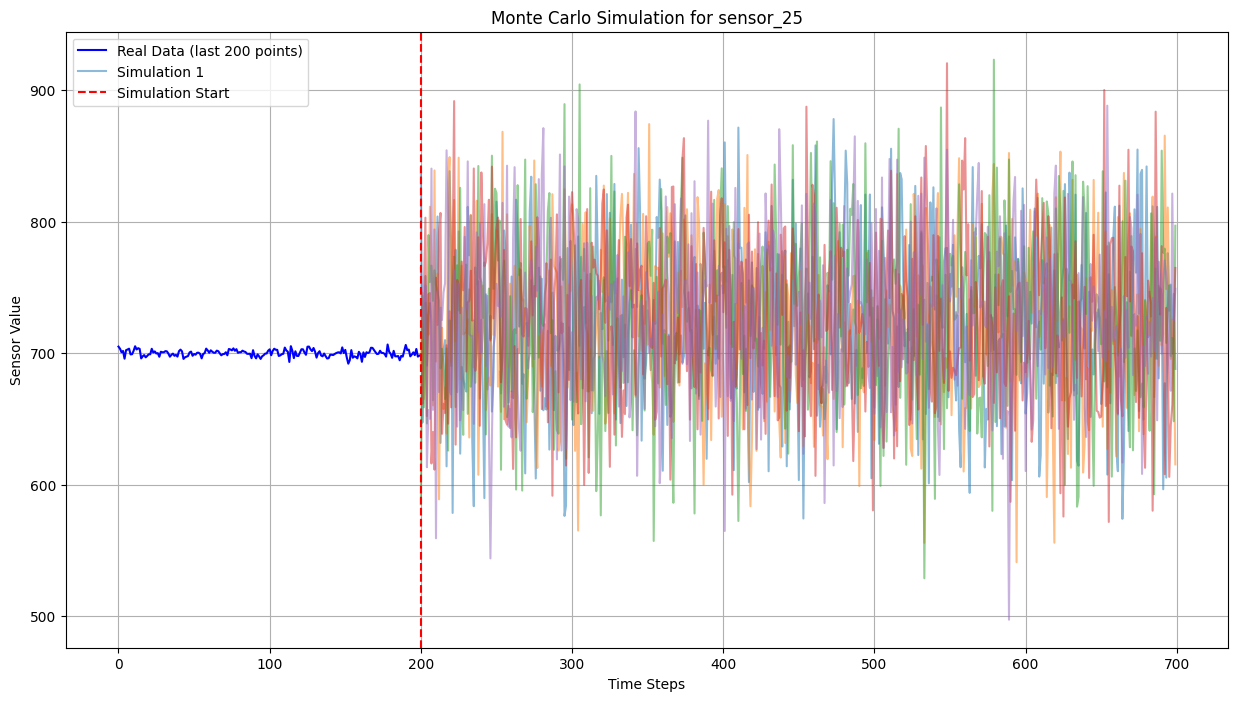

In [126]:
# Visualization
plt.figure(figsize=(15, 8))
plt.plot(df_sensors[target_sensor].values[-200:], label='Real Data (last 200 points)', color='blue')

for i in range(5):  # Plot first 5 simulations
    plt.plot(range(200, 700), simulations[i], alpha=0.5, 
             label=f'Simulation {i+1}' if i == 0 else None)

plt.axvline(200, color='red', linestyle='--', label='Simulation Start')
plt.title(f'Monte Carlo Simulation for {target_sensor}')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Value')
plt.legend()
plt.grid(True)
plt.show()